## 해시법, Hashing
- ‘데이터를저장할위치 곧, 인덱스’를 구하는 방법
- 저장과검색에 극단적인 효율 가짐

    ==> 그러나 공간을 희생하게 됨
- 정렬된 원소 중간에 원소를 추가할 경우 그 뒤는 모두 하나씩 밀리게 됨.

h(x) = x mod 13이라면

h(25) = 25 % 13 = 12 => 12번 인덱스에 저장

연산 결과의 인덱스에 해당 x가 없다면 검색 실패를 바로 알 수 있음(극단적 효율)

==> 새로운 값을 추가해도 원소 이동 필요 없음

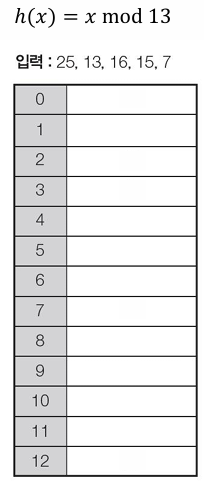

### 충돌 가능
- 같은 해시값을 갖는 원소가 존재할 경우 발생

### 충돌 해결 방법
- **체인법** : 같은 해시값의 원소들을 연결 리스트로 관리
- **오픈 주소법** : 빈 버킷 찾을 때까지 해시 반복 수행

    ==> 해시함수를 변경하는 건가?

### 체인법 구현

#### 1. Node클래스(자기참조형클래스)
- 해시테이블의 각버킷은 해시값이 동일한 원소의 연결리스트의 헤드노드를 참조

- Node 클래스가 존재하여 다음 노드 객체

#### 2. ChainedHash 클래스
- 해시테이블의 크기인 capacity(용량)이 중요함
- isinstance : 정수형인지 확인
- key를 문자열로 변환하여 바이트코드로 인코딩하고,

     sha256으로 암호화 후 16진수(hexdigest, hashlib 모듈과 함께 사용)로 변환함.

     ** 해싱되어 저장되면 다시 key로 되돌릴 수 없음 **

    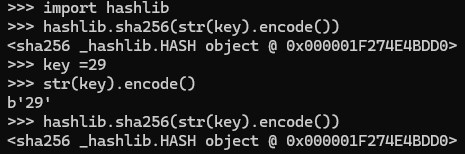

### 3. search 함수


### 4. add 함수
    -  새로운 원소는 연결리스트의 맨 앞에 추가한다. ==> 왜지?

### 5. remove 함수
    - pp 변수 추가

### 6. dump 함수
    


### chainedhash 클래스를 이용한 프로그램 구현
- from enum import Enum
     - 열거형(Enum) 클래스를 정의하여 값을 열거형으로 관리할 수 있음.
     - 각 상수에 이름을 부여하여 코드에서 상수 값의 의미를 쉽게 알 수 있음.

     ```python
    from enum import Enum

    # 열거형 클래스 정의
    class Day(Enum):
        MONDAY = 1
        TUESDAY = 2
        WEDNESDAY = 3
        THURSDAY = 4
        FRIDAY = 5
        SATURDAY = 6
        SUNDAY = 7

    # 열거형 값 사용
    print(Day.MONDAY)       # 출력: Day.MONDAY
    print(Day.MONDAY.name)  # 출력: MONDAY
    print(Day.MONDAY.value) # 출력: 1
     ```

In [1]:
# 체인법으로 해시함수 구현하기
from __future__ import annotations
from typing import Any, Type
import hashlib

class Node:
    def __init__(self, key: Any, value: Any, next: Node) -> None:
        self.key = key
        self.value = value
        self.next = next

class ChainedHash:
    def __init__(self, capacity: int) -> None:
        self.capacity = capacity
        self.table = [None] * self.capacity

    def hash_value(self, key: Any) -> int:
        if isinstance(key, int):
            return key % self.capacity
        return(int(hashlib.sha256(str(key).encode()).hexdigest(), 16) % self.capacity)

    def search(self, key: Any) -> Any:
        hash = self.hash_value(key)
        p = self.table[hash]

        while p is not None:
            if p.key == key:
                return p.value
            p = p.next
        return None

    def add(self, key: Any, value: Any) -> bool:
        hash = self.hash_value(key)
        p = self.table[hash]

        while p is not None:
            if p.key == key:
                return False
            p = p.next

        temp = Node(key, value, self.table[hash])
        self.table[hash] = temp
        return True

    def remove(self, key: Any) -> bool:
        hash = self.hash_value(key)
        pp = None
        p = self.table[hash]

        while p is not None:
            if p.key == key:
                if pp is None:
                    self.table[hash] = p.next
                else:
                    pp.next = p.next
                return True
            pp = p
            p = p.next
        return False

    def dump(self) -> None:
        for i in range(self.capacity):
            p = self.table[i]
            print(i, end='')
            while p is not None:
                print(f' -> {p.key} ({p.value})', end='')
                p = p.next
            print()

In [3]:
from enum import Enum
Menu = Enum('Menu', ['추가', '삭제', '검색', '덤프', '종료'])

def select_menu() -> Menu:
    s = [f'({m.value}){m.name}' for m in Menu]
    while True:
        print(*s, sep = '   ', end='')
        n = int(input(': '))
        if 1 <= n <= len(Menu):
            return Menu(n)

hash = ChainedHash(13)

while True:
    menu = select_menu()

    if menu == Menu.추가:
        key = int(input('추가할 키를 입력하세요.: '))
        val = input('추가할 값을 입력하세요.: ')
        if not hash.add(key, val):
            print('추가를 실패했습니다!')

    elif menu == Menu.삭제:
        key = int(input('삭제할 키를 입력하세요.: '))
        if not hash.remove(key):
            print('삭제를 실패했습니다!')

    elif menu == Menu.검색:
        key = int(input('검색할 키를 입력하세요.: '))
        t = hash.search(key)
        if t is not None:
            print(f'검색한 키를 갖는 값은 {t}입니다.')
        else:
            print('검색할 데이터가 없습니다.')

    elif menu == Menu.덤프:
        hash.dump()

    else:
        break

(1)추가   (2)삭제   (3)검색   (4)덤프   (5)종료: 1
추가할 키를 입력하세요.: 1
추가할 값을 입력하세요.: 수연
(1)추가   (2)삭제   (3)검색   (4)덤프   (5)종료: 1
추가할 키를 입력하세요.: 5
추가할 값을 입력하세요.: 동혁
(1)추가   (2)삭제   (3)검색   (4)덤프   (5)종료: 1
추가할 키를 입력하세요.: 12
추가할 값을 입력하세요.: 원준
(1)추가   (2)삭제   (3)검색   (4)덤프   (5)종료: 1
추가할 키를 입력하세요.: 14
추가할 값을 입력하세요.: 민서
(1)추가   (2)삭제   (3)검색   (4)덤프   (5)종료: 3
검색할 키를 입력하세요.: 5
검색한 키를 갖는 값은 동혁입니다.
(1)추가   (2)삭제   (3)검색   (4)덤프   (5)종료: 4
0
1 -> 14 (민서) -> 1 (수연)
2
3
4
5 -> 5 (동혁)
6
7
8
9
10
11
12 -> 12 (원준)
(1)추가   (2)삭제   (3)검색   (4)덤프   (5)종료: 2
삭제할 키를 입력하세요.: 14
(1)추가   (2)삭제   (3)검색   (4)덤프   (5)종료: 4
0
1 -> 1 (수연)
2
3
4
5 -> 5 (동혁)
6
7
8
9
10
11
12 -> 12 (원준)
(1)추가   (2)삭제   (3)검색   (4)덤프   (5)종료: 5


### 오픈 주소법
- 충돌이발생했을때 재해싱rehashing을 수행
- 선형탐사법

     ℎ′(𝑥) =(ℎ(𝑥)+1)modm : 옆으로 한칸 이동하는 방법

#### 오픈 주소법 문제점
- 이미 원소가 있어 재해싱했고, 이후 원래 해싱 자리의 원소가 삭제된 경우

    원래 해싱 자리에 "삭제"표시를 해주어야 함.

    재해싱 했던 원소를 찾을 때,

    첫번째 해싱 자리가 완전히 비어있다면 바로 검색 실패가 되고

    삭제 표시가 있다면 재해싱을 할 수 있음

#### Status 클래스

```python
Stasus = Enum('Status', ['Occu','Emp', 'Delet'])
```

In [4]:
from __future__ import annotations
from typing import Any, Type
from enum import Enum
import hashlib

class Status(Enum):
    OCCUPIED = 0
    EMPTY = 1
    DELETED = 2

class Bucket:
    def __init__(self, key:Any = None, value: Any = None, stat: Status = Status.EMPTY) -> None:
        self.key = key
        self.value = value
        self.stat = stat

    def set(self, key: Any, value: Any, stat: Status) -> None:
        self.key = key
        self.value = value
        self.stat = stat

    def set_status(self, stat: Status) -> None:
        self.stat = stat

class OpenHash:
    def __init__(self, capacity: int) -> None:
        self.capacity = capacity
        self.table = [Bucket()] * self.capacity

    def hash_value(self, key: Any) -> int:
        if isinstance(key, int):
            return key % self.capacity
        return(int(hashlib.md5(str(key).encode()).hexdigest(), 16) % self.capacity)

    def rehash_value(self, key: Any) -> int:
        return(self.hash_value(key) + 1) % self.capacity

    def search_node(self, key: Any) -> Any:
        hash = self.hash_value(key)
        p = self.table[hash]

        for i in range(self.capacity):
            if p.stat == Status.EMPTY:
                break
            elif p.stat == Status.OCCUPIED and p.key == key:
                return p
            hash = self.rehash_value(hash)
            p = self.table[hash]
        return None

    def search(self, key: Any) -> Any:
        p = self.search_node(key)
        if p is not None:
            return p.value
        else:
            return None

    def add(self, key: Any, value: Any) -> bool:
        if self.search(key) is not None:
            return False

        hash = self.hash_value(key)
        p = self.table[hash]
        for i in range(self.capacity):
            if p.stat == Status.EMPTY or p.stat == Status.DELETED:
                self.table[hash] = Bucket(key, value, Status.OCCUPIED)
                return True
            hash = self.rehash_value(hash)
            p = self.table[hash]
        return False

    def remove(self, key: Any) -> int:
        p = self.search_node(key)
        if p is None:
            return False
        p.set_status(Status.DELETED)
        return True

    def dump(self) -> None:
        for i in range(self.capacity):
            print(f'{i:2} ', end='')
            if self.table[i].stat == Status.OCCUPIED:
                print(f'{self.table[i].key} ({self.table[i].value})')
            elif self.table[i].stat == Status.EMPTY:
                print('--미등록--')
            elif self.table[i].stat == Status.DELETED:
                print('--삭제 완료--')

In [5]:
from enum import Enum
Menu = Enum('Menu', ['추가', '삭제', '검색', '덤프', '종료'])

def select_menu() -> Menu:
    s = [f'({m.value}){m.name}' for m in Menu]
    while True:
        print(*s, sep = '   ', end='')
        n = int(input(': '))
        if 1 <= n <= len(Menu):
            return Menu(n)

hash = OpenHash(13)

while True:
    menu = select_menu()

    if menu == Menu.추가:
        key = int(input('추가할 키를 입력하세요.: '))
        val = input('추가할 값을 입력하세요.: ')
        if not hash.add(key, val):
            print('추가를 실패했습니다!')

    elif menu == Menu.삭제:
        key = int(input('삭제할 키를 입력하세요.: '))
        if not hash.remove(key):
            print('삭제를 실패했습니다!')

    elif menu == Menu.검색:
        key = int(input('검색할 키를 입력하세요.: '))
        t = hash.search(key)
        if t is not None:
            print(f'검색한 키를 갖는 값은 {t}입니다.')
        else:
            print('검색할 데이터가 없습니다.')

    elif menu == Menu.덤프:
        hash.dump()

    else:
        break

(1)추가   (2)삭제   (3)검색   (4)덤프   (5)종료: 1
추가할 키를 입력하세요.: 5
추가할 값을 입력하세요.: 수진
(1)추가   (2)삭제   (3)검색   (4)덤프   (5)종료: 5
